<a href="https://colab.research.google.com/github/Sakshams-2520/Repo/blob/master/Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout,Flatten, Dense

In [3]:
from tensorflow.keras.optimizers import Adam

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import os

In [7]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [9]:
!pwd

/content/drive/My Drive


In [10]:
!mkdir ~/.kaggle

In [11]:
!cp kaggle.json ~/.kaggle/

In [12]:
os.environ['Kaggle Username']='sakshamsaxena999'
os.environ['Kaggle Key']='a7fc4730c371db6b79fae5a39936d892'

In [13]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

covid-face-mask-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
!pip install kaggle

In [20]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
replace New Masks Dataset/Test/Mask/2070.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [21]:
main_dir='/content/drive/MyDrive/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

In [22]:
train_mask_dir= os.path.join(train_dir,'Mask')
train_non_mask_dir= os.path.join(train_dir,'Non Mask')

In [23]:
train_mask_names= os.listdir(train_mask_dir)
print(train_mask_names[:10])
train_non_mask_names= os.listdir(train_non_mask_dir)
print(train_mask_names[:10])
print(train_non_mask_names[:10])

['0029.jpg', '0027.jpg', '0042.jpg', '0018.jpg', '0006.jpg', '0019.jpg', '0022.jpg', '0040.jpg', '0003.jpg', '0037.jpg']
['0029.jpg', '0027.jpg', '0042.jpg', '0018.jpg', '0006.jpg', '0019.jpg', '0022.jpg', '0040.jpg', '0003.jpg', '0037.jpg']
['130.jpg', '110.jpg', '120.jpg', '127.jpg', '107.jpg', '118.jpg', '143.jpg', '123.jpg', '145.jpg', '104.jpg']


In [24]:
import matplotlib.image as mpimg

In [25]:
nrows=4
ncols=4
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [26]:
mask_pic=[]
for i in train_mask_names[0:8]:
      mask_pic.append(os.path.join(train_mask_dir,i))

In [27]:
nomask_pic=[]
for i in train_non_mask_names[0:8]:
      nomask_pic.append(os.path.join(train_non_mask_dir,i))

In [28]:
print(mask_pic)
print(nomask_pic)

['/content/drive/MyDrive/New Masks Dataset/Train/Mask/0029.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Mask/0027.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Mask/0042.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Mask/0018.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Mask/0006.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Mask/0019.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Mask/0022.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Mask/0040.jpg']
['/content/drive/MyDrive/New Masks Dataset/Train/Non Mask/130.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Non Mask/110.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Non Mask/120.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Non Mask/127.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Non Mask/107.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Non Mask/118.jpg', '/content/drive/MyDrive/New Masks Dataset/Train/Non Mask/143.jpg', '/content/drive/M

In [29]:
mergedlist=mask_pic+nomask_pic

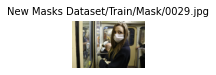

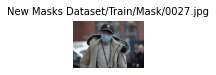

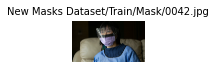

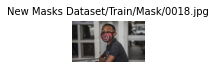

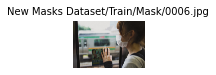

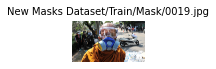

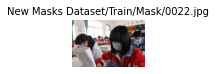

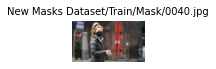

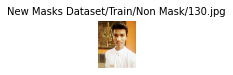

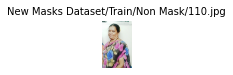

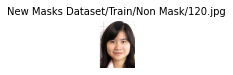

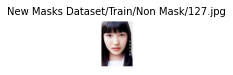

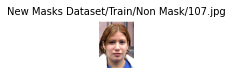

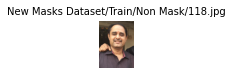

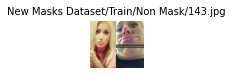

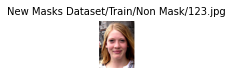

In [30]:
for i in range (len(mergedlist)):
  data=mergedlist[i].split('/',4)[4]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image=mpimg.imread(mergedlist[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
  plt.show()

In [31]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=.2,rotation_range=40,horizontal_flip=True)

In [32]:
test_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [33]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary')
valid_generator=valid_datagen.flow_from_directory(valid_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [34]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [35]:
train_generator.image_shape

(150, 150, 3)

In [36]:
model= Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

In [37]:
model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

In [38]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

In [39]:
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [40]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [41]:
history=model.fit(train_generator,epochs=30,validation_data=valid_generator) 

Epoch 1/30
19/19 [==============================] - 200s 11s/step - loss: 3.5939 - accuracy: 0.5350 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 39s 2s/step - loss: 0.6887 - accuracy: 0.5533 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 35s 2s/step - loss: 0.6636 - accuracy: 0.6550 - val_loss: 0.6831 - val_accuracy: 0.6242
Epoch 4/30
19/19 [==============================] - 35s 2s/step - loss: 0.5137 - accuracy: 0.7767 - val_loss: 0.5541 - val_accuracy: 0.7745
Epoch 5/30
19/19 [==============================] - 35s 2s/step - loss: 0.3851 - accuracy: 0.8417 - val_loss: 0.4980 - val_accuracy: 0.7908
Epoch 6/30
19/19 [==============================] - 35s 2s/step - loss: 0.3102 - accuracy: 0.8900 - val_loss: 0.4779 - val_accuracy: 0.8007
Epoch 7/30
19/19 [==============================] - 36s 2s/step - loss: 0.3224 - accuracy: 0.8767 - val_loss: 0.3884 - val_accuracy: 0.8170
Epoch 8/30
19/19 [

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

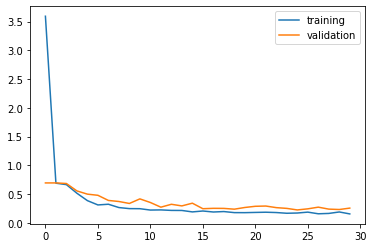

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])

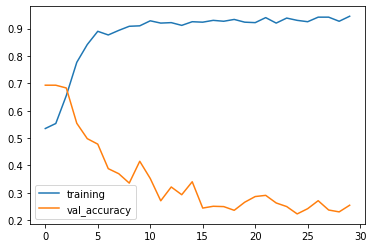

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.legend(['training','val_accuracy'])

In [52]:
test_loss,test_acc = model.evaluate(test_generator)
print('test loss:{},test acc:{}'.format(test_loss,test_acc)) 

4/4 [==============================] - 19s 5s/step - loss: 0.2026 - accuracy: 0.9100
test loss:0.20263580977916718,test acc:0.9100000262260437


In [55]:
from google.colab import files


In [72]:
from keras.preprocessing import image

In [75]:
uploaded=files.upload()
for fname in uploaded.keys():
    img_path='/content/drive/My Drive/'+ fname
    img=image.load_img(img_path,target_size=(150,150))
    images=image.img_to_array(img)
    images=np.expand_dims(images,axis=0)
    prediction=model.predict(images)
    if prediction==0:
      print('mask')
    else:
      print('no mask')

Saving namrata.jpg to namrata.jpg
mask
